# TATA CONSULTANCY SERVICES Share Price Analysis

## Golden Task: Choose a dataset with a time component and perform time series analysis

## Embark on a time series analysis project using a dataset with a time component, specifically historical stock prices. The objective is to uncover patterns, trends, and insights from the temporal data, enabling a better understanding of stock price movements over time.

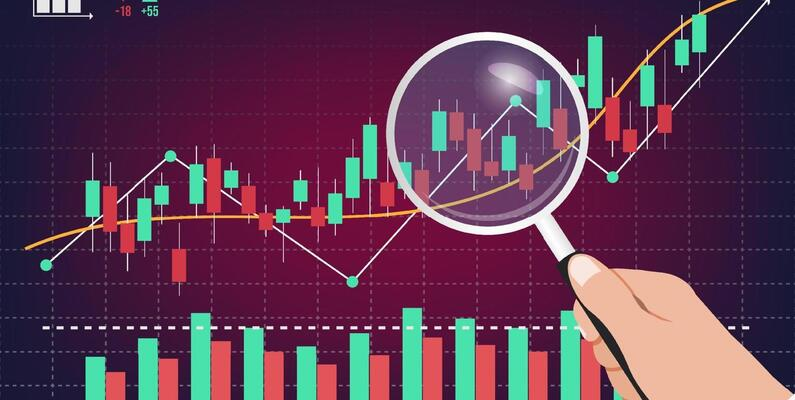

# Importing Libraries and Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import os
import datetime as dt
import yfinance as yf

# 5 Year of Data (2019-2024)

In [2]:
# Data range is 5
end = dt.datetime.today()
start = (end - dt.timedelta(days = (365*5)))

In [3]:
print (start)
print (end)

2019-01-16 13:22:15.629419
2024-01-15 13:22:15.629419


# Downloading the TATA CONSULTANCY SERVICES Data from yahoo finance

In [4]:
ticks =['TCS.NS']
df = yf.download(ticks, start, end )

[*********************100%%**********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-16,1870.000000,1875.000000,1847.000000,1870.150024,1677.917725,2359280
2019-01-17,1878.000000,1898.000000,1871.300049,1894.300049,1703.228516,2625816
2019-01-18,1881.000000,1904.199951,1876.000000,1900.650024,1708.937622,1683728
2019-01-21,1902.000000,1932.000000,1895.449951,1908.699951,1716.175659,2409803
2019-01-22,1907.099976,1918.250000,1890.000000,1901.900024,1710.061646,2457093
...,...,...,...,...,...,...
2024-01-08,3737.899902,3739.750000,3672.399902,3678.300049,3678.300049,1067805
2024-01-09,3709.949951,3752.350098,3682.750000,3689.899902,3689.899902,1370944
2024-01-10,3690.000000,3729.250000,3688.000000,3713.050049,3713.050049,1292227


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-16,1870.000000,1875.000000,1847.000000,1870.150024,1677.917725,2359280
2019-01-17,1878.000000,1898.000000,1871.300049,1894.300049,1703.228516,2625816
2019-01-18,1881.000000,1904.199951,1876.000000,1900.650024,1708.937622,1683728
2019-01-21,1902.000000,1932.000000,1895.449951,1908.699951,1716.175659,2409803
2019-01-22,1907.099976,1918.250000,1890.000000,1901.900024,1710.061646,2457093


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-08,3737.899902,3739.750000,3672.399902,3678.300049,3678.300049,1067805
2024-01-09,3709.949951,3752.350098,3682.750000,3689.899902,3689.899902,1370944
2024-01-10,3690.000000,3729.250000,3688.000000,3713.050049,3713.050049,1292227
2024-01-11,3724.000000,3773.000000,3707.000000,3735.550049,3735.550049,1777909
2024-01-12,3848.000000,3905.250000,3821.600098,3882.800049,3882.800049,6813450


# The dataset retrieved from the Yahoo Finance API for TATA CONSULTANCY SERVICES stocks encompasses historical stock information and includes the following key columns:

####Date: Represents the trading day's date.
####Open: Signifies the opening price of the stock.
####High: Reflects the highest price attained by the stock during the trading day.
####Low: Represents the lowest price reached by the stock within the trading day.
####Close: Indicates the closing price of the stocks.
#### adj close : Adjusted Closing stock price
####Volume: Denotes the total number of shares of the respective stock that were traded on that day.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2019-01-16 to 2024-01-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1234 non-null   float64
 1   High       1234 non-null   float64
 2   Low        1234 non-null   float64
 3   Close      1234 non-null   float64
 4   Adj Close  1234 non-null   float64
 5   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03
mean,2918.840639,2946.573698,2888.966661,2917.573662,2788.282561,2.798775e+06
std,631.740609,633.140601,629.754920,631.861211,660.499844,1.688129e+06
min,1559.699951,1685.449951,1506.050049,1636.349976,1530.852905,0.000000e+00
25%,2207.000000,2234.412476,2185.537476,2205.737488,2035.032776,1.741171e+06
50%,3169.324951,3195.550049,3132.199951,3164.025024,3040.483032,2.371592e+06
75%,3400.037537,3429.750000,3374.312500,3401.624939,3333.326843,3.296124e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3882.800049,1.983933e+07


In [11]:
df.shape

(1234, 6)

In [12]:
df.duplicated().sum()

0

# Data Visualisation

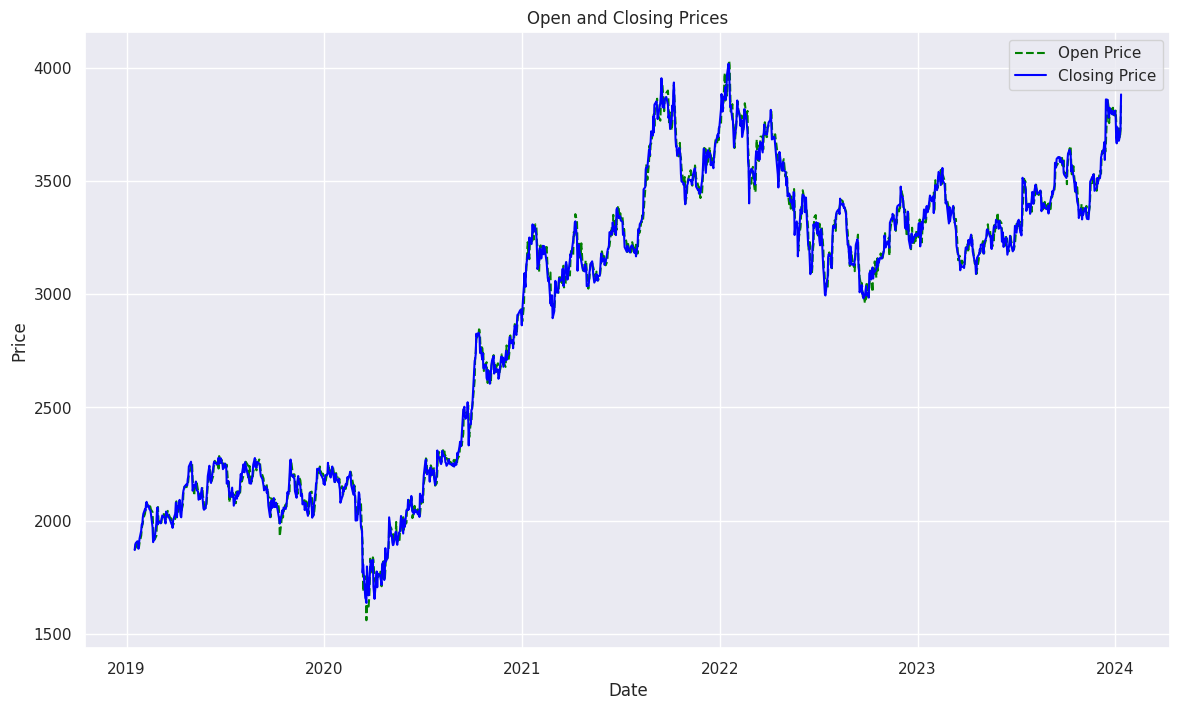

In [13]:
plt.figure(figsize=(14, 8))
plt.plot(df['Open'], label='Open Price', color='green', linestyle='dashed')
plt.plot(df['Close'], label='Closing Price', color='blue', linestyle='solid')
plt.title('Open and Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
import plotly.graph_objects as go
grouped_by_year = df.groupby(df.index.year)

for year, df_year in grouped_by_year:
    fig = go.Figure(data=[go.Candlestick(x=df_year.index,
                    open=df_year['Open'],
                    high=df_year['High'],
                    low=df_year['Low'],
                    close=df_year['Close'])])
    fig.update_layout(title=f'Candlestick Chart for {year}',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=False)
    fig.show()

In [15]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Candlesticks'),
                go.Bar(x=df.index, y=df['Volume'], name='Volume', marker=dict(color='blue'))])

fig.update_layout(title=f'Real Share Market Graph for {year}',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()

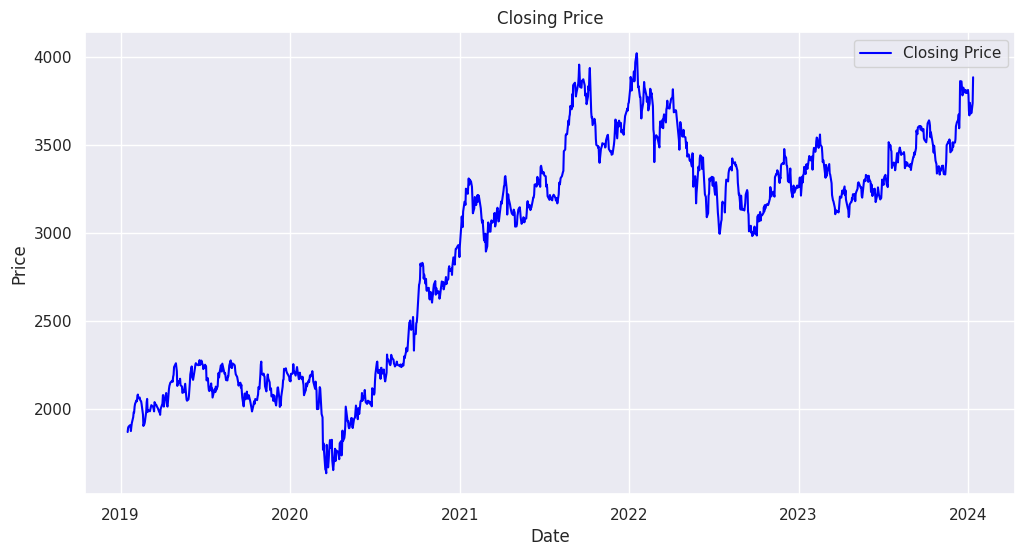

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.title('Closing Price')
plt.ylabel('Price')
plt.legend()
plt.show()

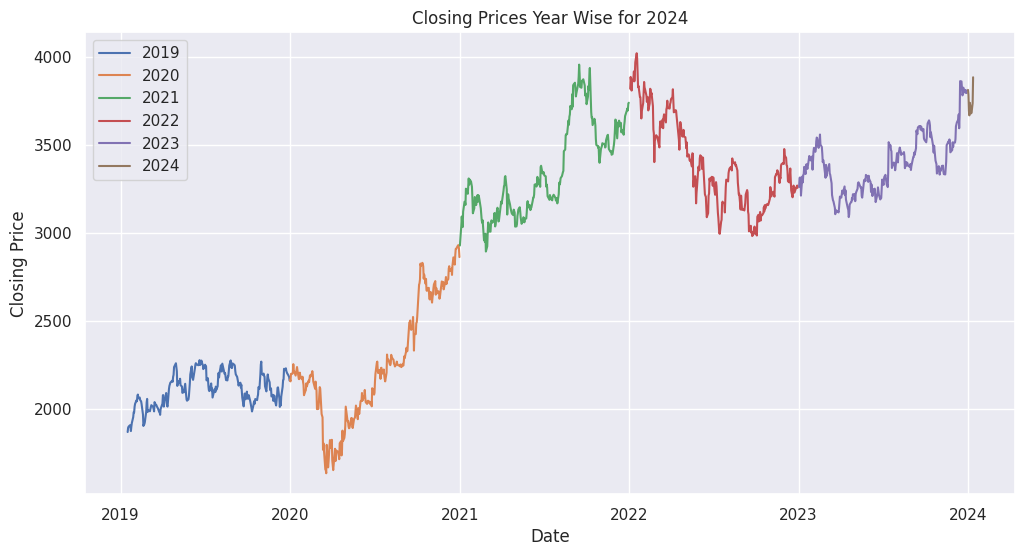

In [17]:
grouped_by_year = df.groupby(df.index.year)

plt.figure(figsize=(12, 6))

for year, df_year in grouped_by_year:
    plt.plot(df_year.index, df_year['Close'], label=str(year))

plt.title(f'Closing Prices Year Wise for {year}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

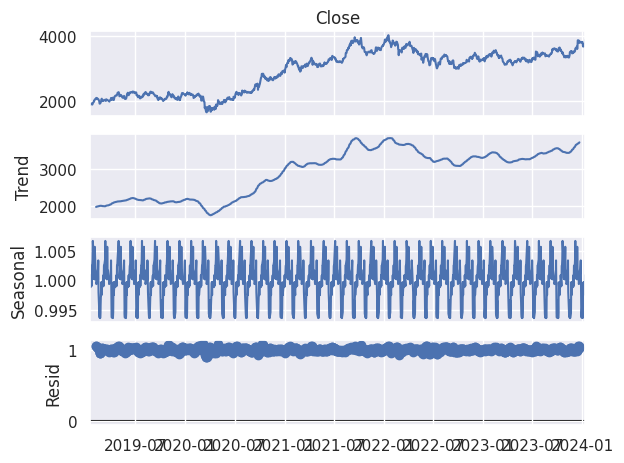

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
result.plot()
plt.show()

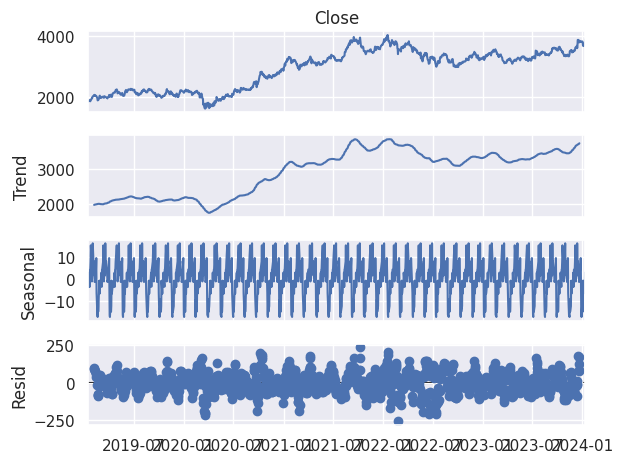

In [19]:
result = seasonal_decompose(df['Close'], model='additive', period=30)
result.plot()
plt.show()

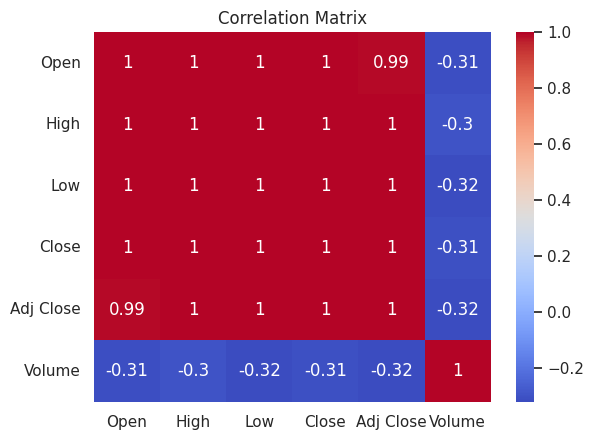

In [20]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

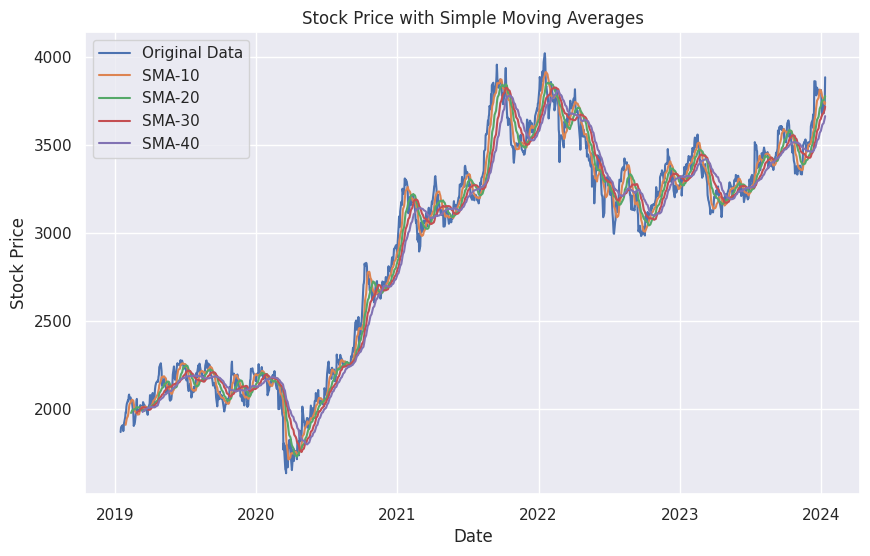

In [21]:
# Simple Moving Average
windows = [10, 20, 30, 40]
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Original Data')

for window_size in windows:
    df[f'SMA_{window_size}'] = df['Close'].rolling(window=window_size).mean()
    plt.plot(df[f'SMA_{window_size}'], label=f'SMA-{window_size}')
plt.title('Stock Price with Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [22]:
#  Durbin Watson Test
import statsmodels.api as sm
durbinwatson_test = sm.stats.durbin_watson(df['Close'])
print('Durbin Watson Test', durbinwatson_test)
if abs(durbinwatson_test)<= 1.5 or abs(durbinwatson_test)>=2.5:
  print('Auto-Correlation is detected')
else:
  print('No auto-Correlation is detected')

Durbin Watson Test 0.00020622402334539403
Auto-Correlation is detected


In [23]:
# Augmented Dickey–Fuller test
from statsmodels.tsa.stattools import adfuller
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - Check Data is Stationary or Non-Stationary")
    labels = ['ADF Test Stats','P-Value', '#Lags','No. of Obs']

    for a, b in zip(result, labels):
        print(b + " : " + str(a))

    if result[1] <=0.05 :
        print(" timeseries is Stationary")
    else:
        print(" timeseries is Non-Stationary")

In [24]:
adf_check(df['Close'])

Augmented Dickey Fuller Test - Check Data is Stationary or Non-Stationary
ADF Test Stats : -1.2788582858980695
P-Value : 0.638788322094185
#Lags : 0
No. of Obs : 1233
 timeseries is Non-Stationary


In [25]:
# To make data stationary, we have to use Lag Function
df['1st diff'] = df['Close'] - df['Close'].shift(1)

In [26]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_20,SMA_30,SMA_40,1st diff
Date,,,,,,,,,,,
2019-01-16,1870.000000,1875.000000,1847.000000,1870.150024,1677.917725,2359280,NaN,NaN,NaN,NaN,NaN
2019-01-17,1878.000000,1898.000000,1871.300049,1894.300049,1703.228516,2625816,NaN,NaN,NaN,NaN,24.150024
2019-01-18,1881.000000,1904.199951,1876.000000,1900.650024,1708.937622,1683728,NaN,NaN,NaN,NaN,6.349976
2019-01-21,1902.000000,1932.000000,1895.449951,1908.699951,1716.175659,2409803,NaN,NaN,NaN,NaN,8.049927
2019-01-22,1907.099976,1918.250000,1890.000000,1901.900024,1710.061646,2457093,NaN,NaN,NaN,NaN,-6.799927


In [27]:
adf_check(df['1st diff'].dropna())

Augmented Dickey Fuller Test - Check Data is Stationary or Non-Stationary
ADF Test Stats : -25.820817812127743
P-Value : 0.0
#Lags : 1
No. of Obs : 1231
 timeseries is Stationary


In [28]:
df = df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close', '1st diff', 'SMA_10', 'SMA_20', 'SMA_30','SMA_40'], axis=1).rename_axis('Date').reset_index()

In [29]:
df

,Date,Close
0,2019-01-16,1870.150024
1,2019-01-17,1894.300049
2,2019-01-18,1900.650024
3,2019-01-21,1908.699951
4,2019-01-22,1901.900024
...,...,...
1229,2024-01-08,3678.300049
1230,2024-01-09,3689.899902
1231,2024-01-10,3713.050049
1232,2024-01-11,3735.550049


In [30]:
df = df.rename(columns={'Date' : 'ds','Close': 'y'})
df

,ds,y
0,2019-01-16,1870.150024
1,2019-01-17,1894.300049
2,2019-01-18,1900.650024
3,2019-01-21,1908.699951
4,2019-01-22,1901.900024
...,...,...
1229,2024-01-08,3678.300049
1230,2024-01-09,3689.899902
1231,2024-01-10,3713.050049
1232,2024-01-11,3735.550049


In [31]:
# Train-Test Split
test = df[len(df)-60 :]
train = df[:len(df)-60]

In [32]:
test.head()

,ds,y
1174,2023-10-17,3507.050049
1175,2023-10-18,3487.250000
1176,2023-10-19,3455.649902
1177,2023-10-20,3494.550049
1178,2023-10-23,3410.149902


In [33]:
test.tail()

,ds,y
1229,2024-01-08,3678.300049
1230,2024-01-09,3689.899902
1231,2024-01-10,3713.050049
1232,2024-01-11,3735.550049
1233,2024-01-12,3882.800049


In [34]:
train.head()

,ds,y
0,2019-01-16,1870.150024
1,2019-01-17,1894.300049
2,2019-01-18,1900.650024
3,2019-01-21,1908.699951
4,2019-01-22,1901.900024


In [35]:
train.tail()

,ds,y
1169,2023-10-10,3628.899902
1170,2023-10-11,3609.899902
1171,2023-10-12,3542.550049
1172,2023-10-13,3570.850098
1173,2023-10-16,3524.050049


In [36]:
# Prophet Model
from prophet import Prophet
model = Prophet(daily_seasonality= True)
model.fit(train)



DEBUG:cmdstanpy:input tempfile: /tmp/tmpi5f8jte5/_hy2cjbu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi5f8jte5/2yzfs84m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95934', 'data', 'file=/tmp/tmpi5f8jte5/_hy2cjbu.json', 'init=/tmp/tmpi5f8jte5/2yzfs84m.json', 'output', 'file=/tmp/tmpi5f8jte5/prophet_modelguh9tzza/prophet_model-20240115132223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
model.seasonalities


OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('daily',
              {'period': 1,
               'fourier_order': 4,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [38]:
future = model.make_future_dataframe(periods = 180,freq='D')
forecast = model.predict(future)

In [39]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-16,1844.890284,1861.715456,2115.447807,1844.890284,1844.890284,141.024657,141.024657,141.024657,-62.755328,...,6.397529,6.397529,6.397529,197.382457,197.382457,197.382457,0.0,0.0,0.0,1985.914941
1,2019-01-17,1848.674172,1866.540274,2115.213216,1848.674172,1848.674172,139.905374,139.905374,139.905374,-62.755328,...,4.519956,4.519956,4.519956,198.140746,198.140746,198.140746,0.0,0.0,0.0,1988.579546
2,2019-01-18,1852.458060,1864.247043,2117.958408,1852.458060,1852.458060,137.350406,137.350406,137.350406,-62.755328,...,1.599404,1.599404,1.599404,198.506330,198.506330,198.506330,0.0,0.0,0.0,1989.808466
3,2019-01-21,1863.809725,1883.332596,2123.979038,1863.809725,1863.809725,136.062986,136.062986,136.062986,-62.755328,...,1.085636,1.085636,1.085636,197.732678,197.732678,197.732678,0.0,0.0,0.0,1999.872711
4,2019-01-22,1867.593613,1879.721727,2129.626058,1867.593613,1867.593613,138.569804,138.569804,138.569804,-62.755328,...,4.311007,4.311007,4.311007,197.014125,197.014125,197.014125,0.0,0.0,0.0,2006.163417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,2024-04-09,3732.653209,3405.699511,3879.418665,3525.937848,3941.891062,-86.281542,-86.281542,-86.281542,-62.755328,...,4.311007,4.311007,4.311007,-27.837221,-27.837221,-27.837221,0.0,0.0,0.0,3646.371666
1350,2024-04-10,3733.608991,3403.271332,3896.107780,3525.256134,3945.288882,-84.887887,-84.887887,-84.887887,-62.755328,...,6.397529,6.397529,6.397529,-28.530088,-28.530088,-28.530088,0.0,0.0,0.0,3648.721104
1351,2024-04-11,3734.564773,3402.799474,3890.638081,3524.786126,3947.450589,-87.744494,-87.744494,-87.744494,-62.755328,...,4.519956,4.519956,4.519956,-29.509122,-29.509122,-29.509122,0.0,0.0,0.0,3646.820279
1352,2024-04-12,3735.520556,3394.325945,3893.435015,3523.564643,3949.917865,-91.919507,-91.919507,-91.919507,-62.755328,...,1.599404,1.599404,1.599404,-30.763583,-30.763583,-30.763583,0.0,0.0,0.0,3643.601049


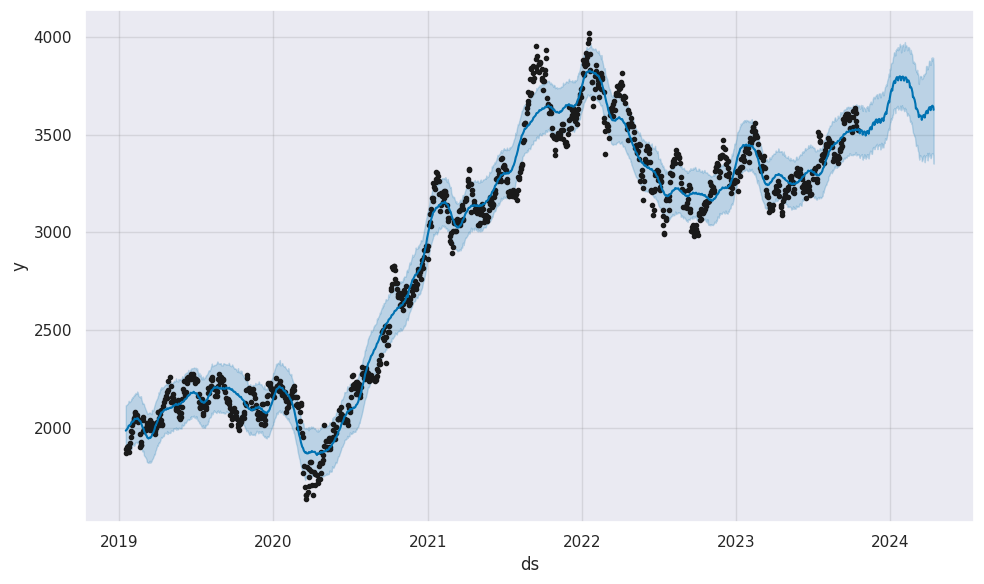

In [40]:
model.plot(forecast)
plt.show()

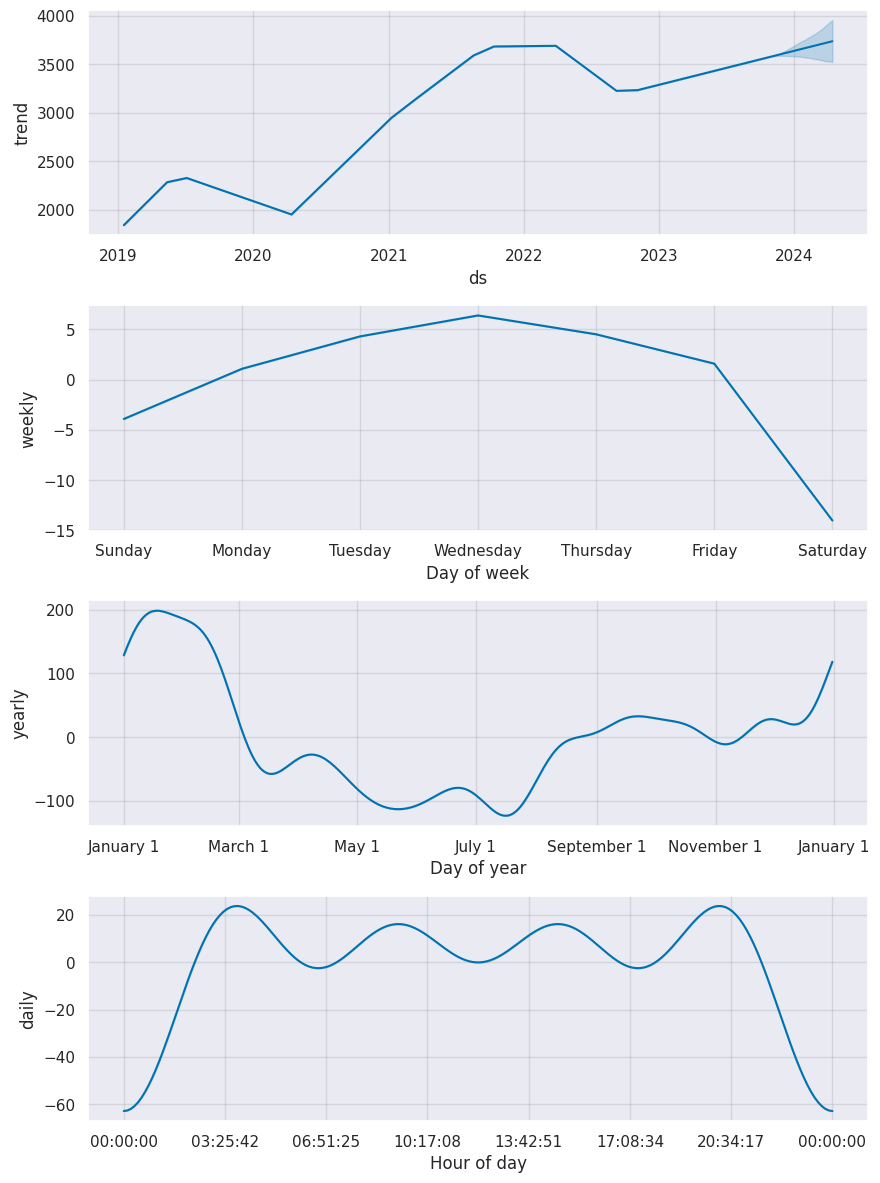

In [41]:
model.plot_components(forecast)
plt.show()

In [42]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [43]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']].tail(30)

,ds,yhat_lower,yhat_upper,yhat
1324,2024-03-15,3385.484607,3799.640224,3591.571183
1325,2024-03-16,3364.623137,3784.991556,3575.815995
1326,2024-03-17,3367.801065,3785.172840,3586.327057
1327,2024-03-18,3373.276595,3788.983171,3592.247410
1328,2024-03-19,3387.941934,3791.917539,3596.874317
1329,2024-03-20,3386.893701,3808.023098,3600.785923
1330,2024-03-21,3396.691234,3802.546123,3601.104149
1331,2024-03-22,3385.154606,3807.095354,3600.694920
1332,2024-03-23,3359.354886,3812.911812,3587.858491
1333,2024-03-24,3380.635040,3815.264700,3600.931544


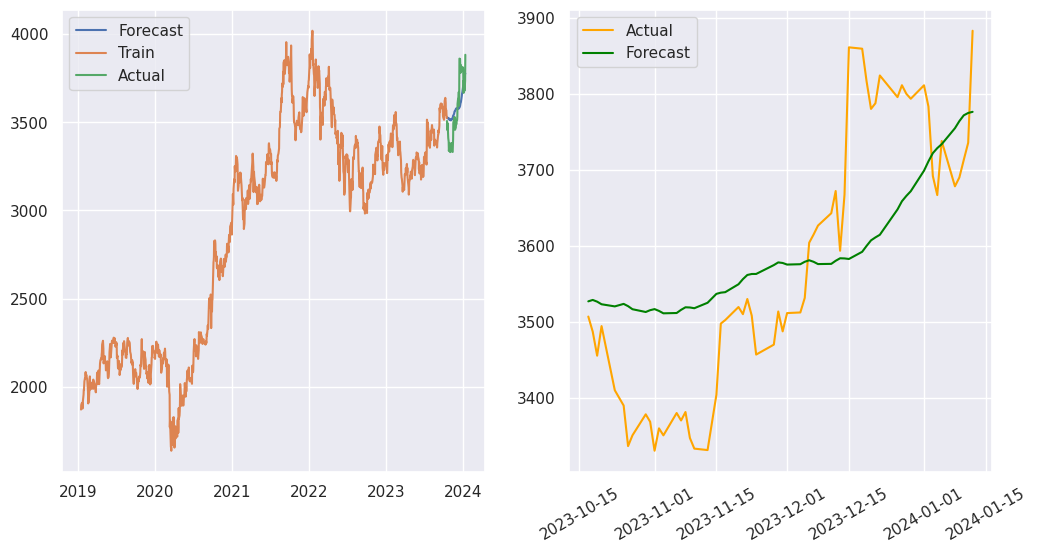

In [44]:
prediction = forecast[forecast.ds.isin(test.ds)]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(test.ds, prediction['yhat'], label='Forecast')
plt.plot(train.ds, train['y'], label='Train')
plt.plot(test.ds, test['y'], label='Actual',)
plt.legend()
plt.subplot(1,2,2)
plt.plot(test.ds, test['y'], label='Actual', color = 'orange')
plt.plot(test.ds, prediction['yhat'], label='Forecast', color = 'green')
plt.xticks(rotation=30)
plt.legend()
plt.show()


In [45]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
actual = test[['y','ds']]
pred = forecast[['yhat','ds']][len(train):]
merged_data = actual.merge(pred, on='ds')
# Calculate MAPE
mape = mean_absolute_percentage_error(merged_data['y'], merged_data['yhat'])
print("MAPE:", mape)
# Calculate MSE
mse = mean_squared_error(merged_data['y'], merged_data['yhat'], squared = True)
print("MSE:", mse)
# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

MAPE: 0.02941267349972753
MSE: 15110.652599733792
RMSE: 122.92539444611839
